# Implied Volatility Extraction and Visualization

## Extract option data and provide some simple visualization and smoothing to get a general sense of the shape of the volatility surface

### Import volatility module

In [1]:
import volvisualizer.volatility as vol

### Initialise a volatility object as imp

In [2]:
imp = vol.Volatility()

### Supply a dictionary of option chain urls from Yahoo Finance for Tesla options with various maturities

In [3]:
url_dict = {'2020-11-20':str('https://finance.yahoo.com/quote/TSLA/options?date=1605830400&p=TSLA'),
            '2020-12-18':str('https://finance.yahoo.com/quote/TSLA/options?date=1608249600&p=TSLA'),
            '2021-01-15':str('https://finance.yahoo.com/quote/TSLA/options?date=1610668800&p=TSLA'),
            '2021-02-19':str('https://finance.yahoo.com/quote/TSLA/options?date=1613692800&p=TSLA'),
            '2021-03-19':str('https://finance.yahoo.com/quote/TSLA/options?date=1616112000&p=TSLA'),
            '2021-06-18':str('https://finance.yahoo.com/quote/TSLA/options?date=1623974400&p=TSLA'),
            '2021-09-17':str('https://finance.yahoo.com/quote/TSLA/options?date=1631836800&p=TSLA'),
            '2022-03-18':str('https://finance.yahoo.com/quote/TSLA/options?date=1647561600&p=TSLA'),
            '2022-06-17':str('https://finance.yahoo.com/quote/TSLA/options?date=1655424000&p=TSLA'),
            '2022-09-16':str('https://finance.yahoo.com/quote/TSLA/options?date=1663286400&p=TSLA')}

### Or extract all the urls available for the ticker

In [3]:
ticker = 'TSLA'
imp.extracturls(ticker)

### Extract the option data from these urls

In [4]:
imp.extractoptions(wait=1)

### Filter the data for only recent quotes and format dates, add Mid Price, Time To Maturity columns  

In [7]:
start_date = '2020-10-26'
imp.transform(start_date, monthlies=True)

### Select a range of call and put strikes and spot reference

In [8]:
put_strikes = list(range(200, 425, 25))
call_strikes = list(range(425, 850, 50))
spot = 414.56

imp.combine(ticker, put_strikes, call_strikes, spot, r=0.005, q=0, epsilon=0.001, 
            method='nr')

### Display a line graph of the implied volatilities of the various maturities by strike

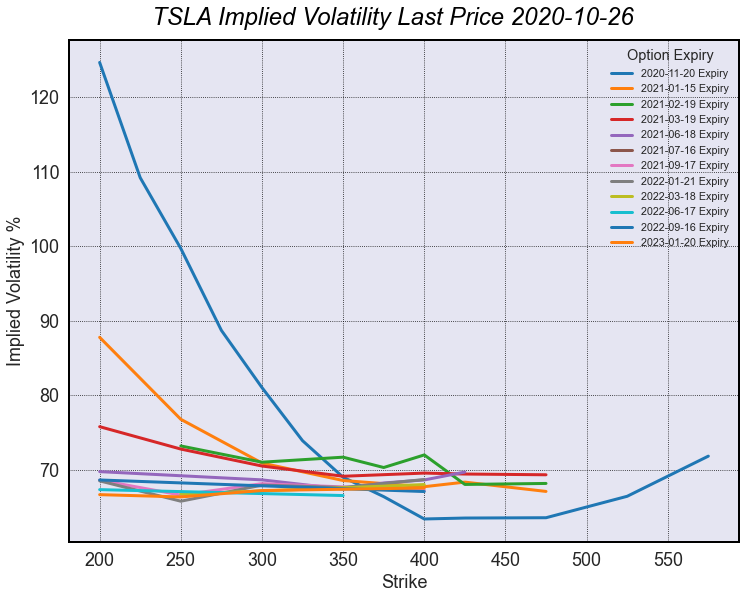

In [9]:
imp.visualize(graphtype='line')

### Display a 3D scatter plot of the implied volatilities by strike and tenor, choose bid, mid, ask or last price to calculate implied vol 

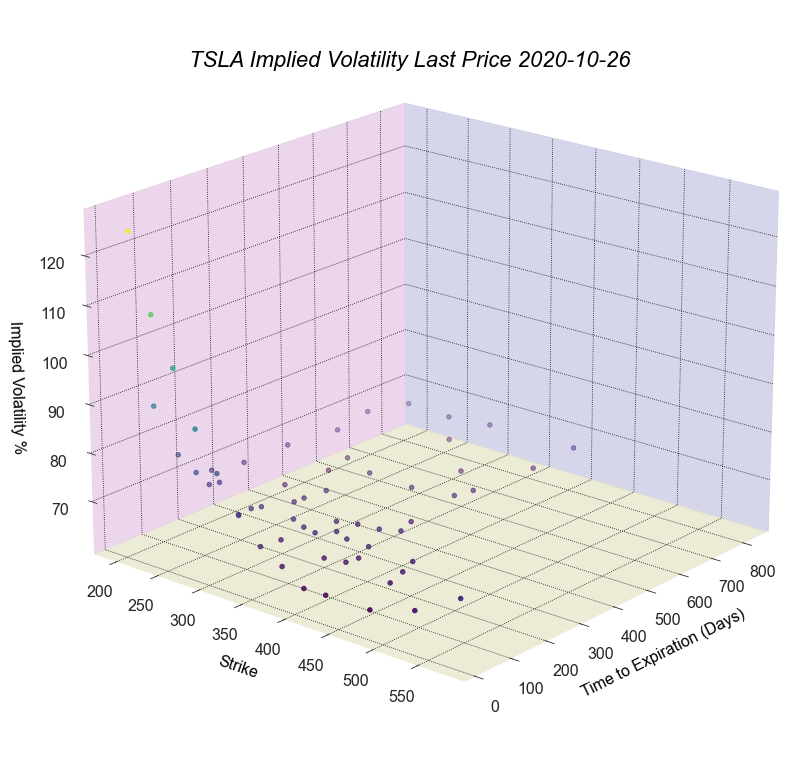

In [10]:
imp.visualize(graphtype='scatter', voltype='last')

### Display a 3D surface plot of the implied volatilities by strike and tenor - Triangular Surface plot

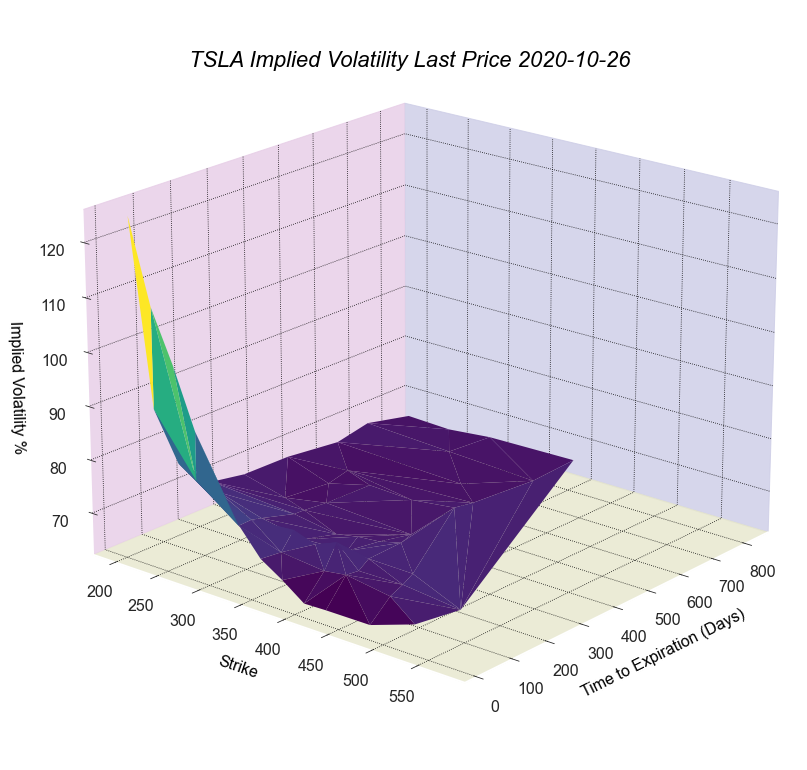

In [11]:
imp.visualize(graphtype='surface', surfacetype='trisurf', smoothing=False)

### Display a 3D surface plot of the implied volatilities by strike and tenor - Triangular Surface plot with 3rd order polynomial smoothing

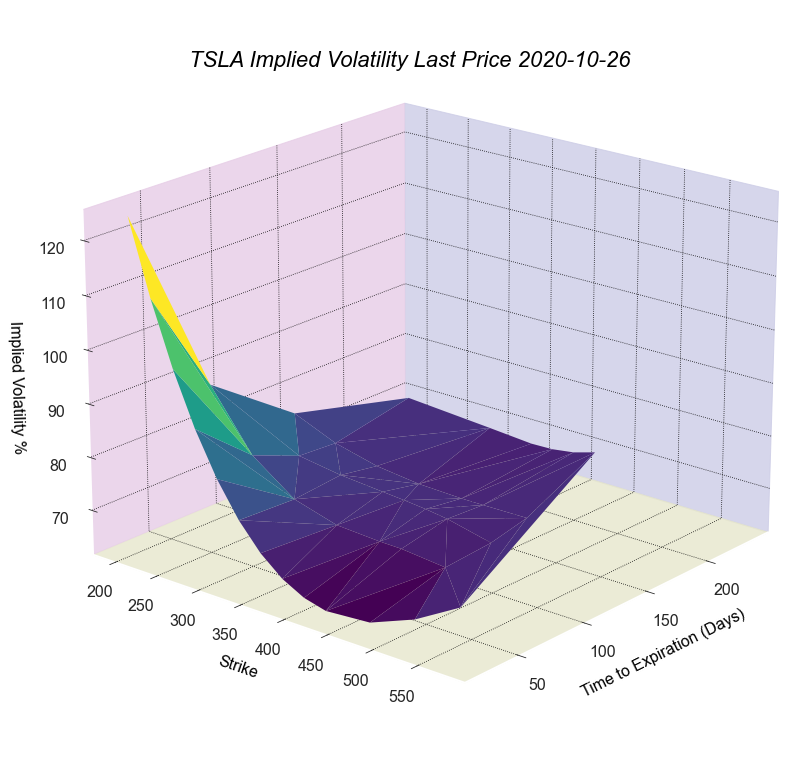

In [12]:
imp.visualize(graphtype='surface', surfacetype='trisurf', smoothing=True, voltype='last')

### Display a 3D surface plot of the implied volatilities by strike and tenor - meshgrid plot with smoothing

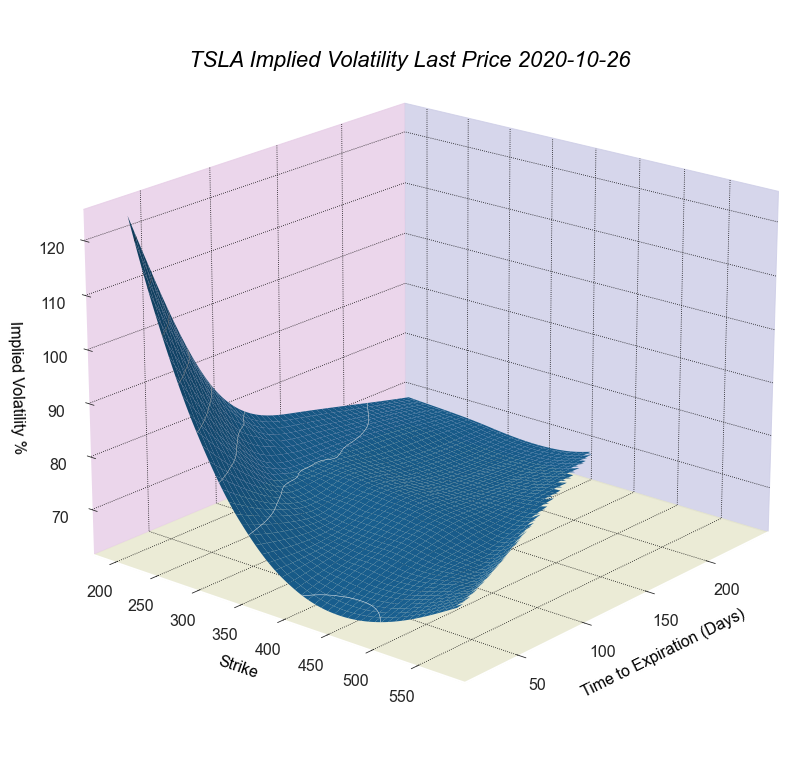

In [13]:
imp.visualize(graphtype='surface', surfacetype='mesh', smoothing=True)

### Display a 3D surface plot of the implied volatilities by strike and tenor - meshgrid plot with smoothing, radial basis function with scatter overlay

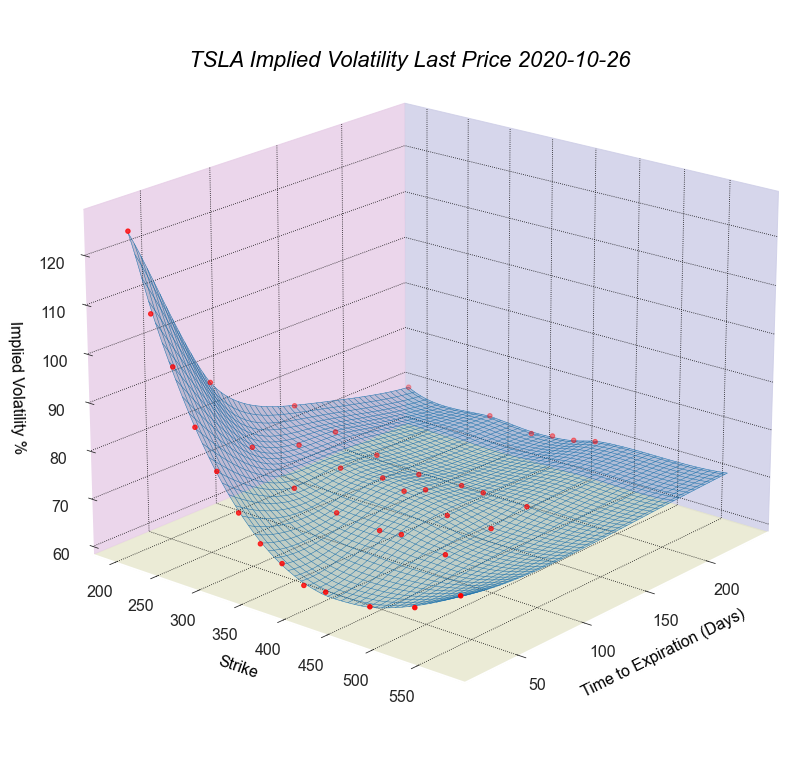

In [14]:
imp.visualize(graphtype='surface', surfacetype='spline', scatter=True, smoothing=True)

### Display a 3D surface plot of the implied volatilities by strike and tenor - Plotly interactive meshgrid plot with smoothing

In [15]:
imp.visualize(graphtype='surface', surfacetype='interactive_mesh', smoothing=True, notebook=True)

### Display a 3D surface plot of the implied volatilities by strike and tenor - Plotly interactive spline plot with smoothing

In [16]:
imp.visualize(graphtype='surface', surfacetype='interactive_spline', smoothing=True)

### Display a 3D surface plot of the implied volatilities by strike and tenor - Plotly interactive spline plot with smoothing, cubic radial basis function, colorscale jet

In [17]:
imp.visualize(graphtype='surface', surfacetype='interactive_spline', rbffunc='cubic', 
              colorscale='Jet', smoothing=True)